In [30]:
import sys; sys.path.insert(0,'..')
from cadence.imports import *
!rm -rf {PATH_DB}
txt="How heavy, do I journey on the way,"
txt="And and AND that repose"

txt="""
Does teach that ease and that repose to say.
Does teach my ease and my repose to say.
Does teach man's ease and man's repose to say.
"""

text = Verse(txt)
para = text.para(1)

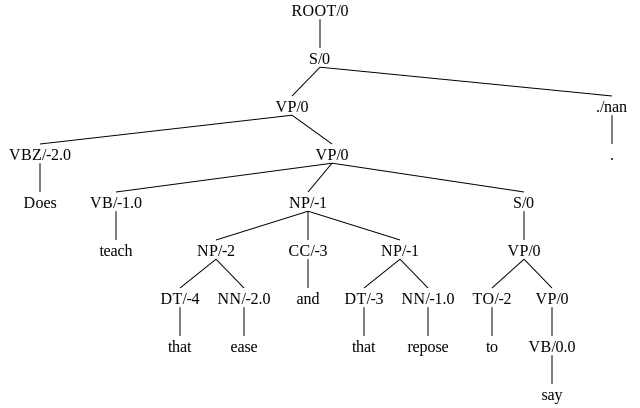

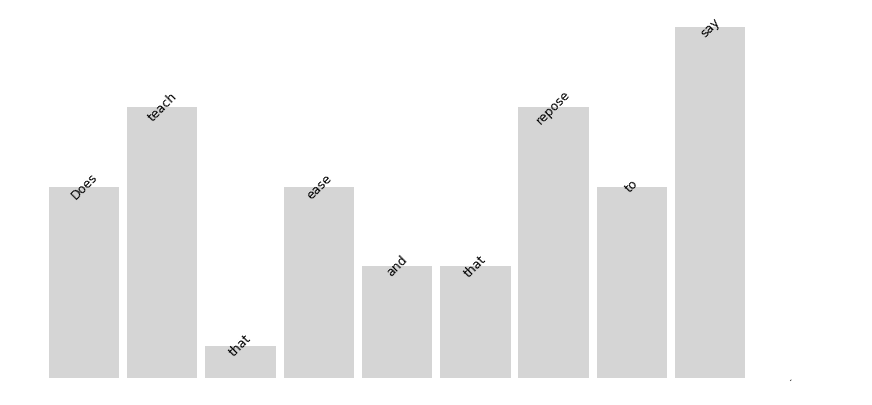

<ggplot: (751666463)>

,word_i,word_str,prom_lstress,prom_pstress,prom_tstress,prom_pstrength,mtree_ishead
0,1,Does,0.0,0.0,0.50,NaN,NaN
1,2,teach,1.0,0.0,0.75,NaN,NaN
2,3,that,0.0,0.0,0.00,0.0,0.0
3,4,ease,1.0,1.0,0.50,1.0,1.0
4,5,and,0.0,0.0,0.25,0.0,NaN
5,6,that,0.0,0.0,0.25,0.0,0.0
6,7,repose,1.0,1.0,0.75,1.0,1.0
7,8,to,0.0,0.0,0.50,0.0,NaN
8,9,say,1.0,1.0,1.00,1.0,NaN
9,10,.,NaN,NaN,NaN,NaN,NaN


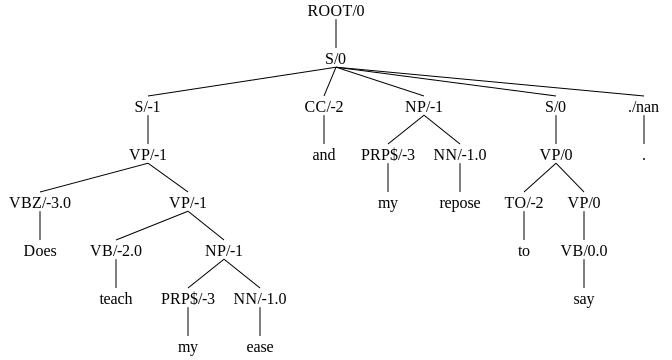

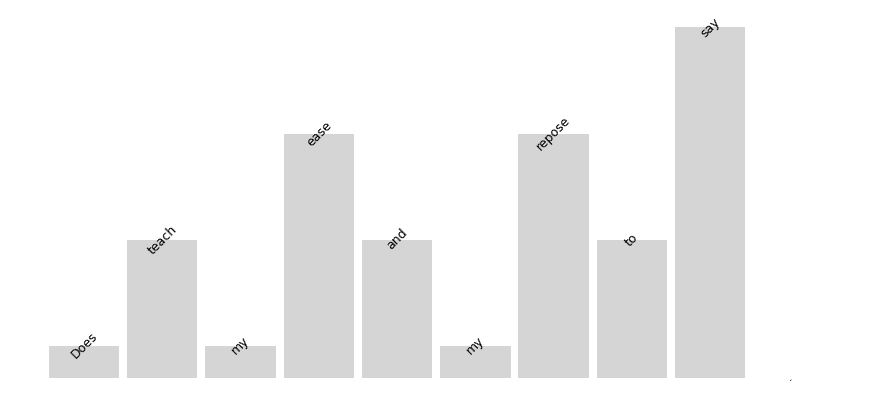

<ggplot: (751742088)>

,word_i,word_str,prom_lstress,prom_pstress,prom_tstress,prom_pstrength,mtree_ishead
0,1,Does,0.0,0.0,0.000000,NaN,NaN
1,2,teach,1.0,0.0,0.333333,NaN,NaN
2,3,my,0.0,0.0,0.000000,0.0,0.0
3,4,ease,1.0,1.0,0.666667,1.0,1.0
4,5,and,0.0,0.0,0.333333,0.0,0.0
5,6,my,0.0,0.0,0.000000,0.0,0.0
6,7,repose,1.0,1.0,0.666667,1.0,1.0
7,8,to,0.0,0.0,0.333333,0.0,NaN
8,9,say,1.0,1.0,1.000000,1.0,NaN
9,10,.,NaN,NaN,NaN,NaN,NaN


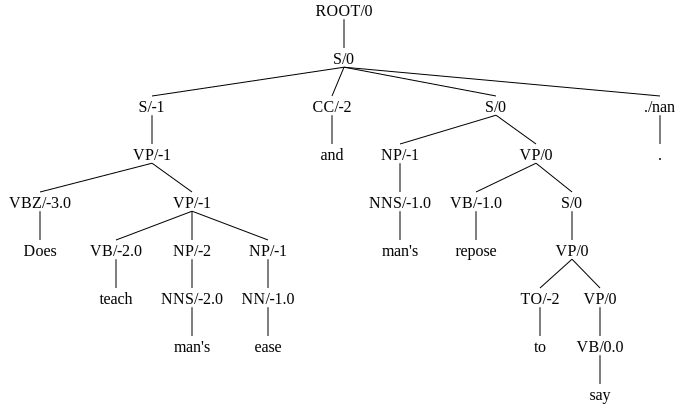

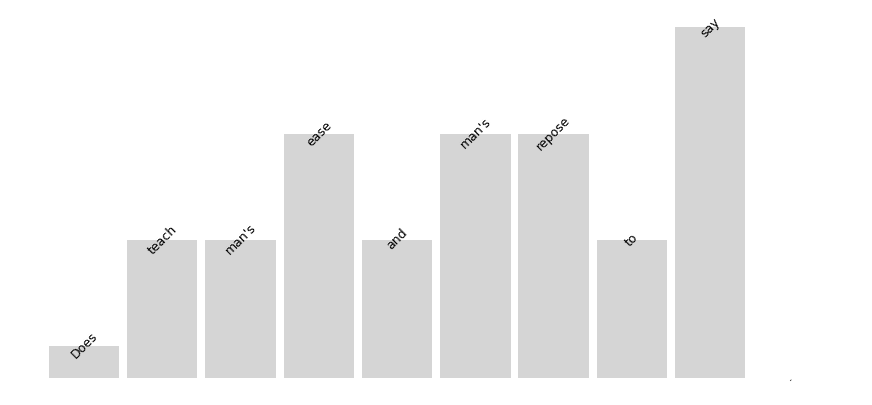

<ggplot: (752466899)>

,word_i,word_str,prom_lstress,prom_pstress,prom_tstress,prom_pstrength,mtree_ishead
0,1,Does,0.0,0.0,0.000000,NaN,NaN
1,2,teach,1.0,0.0,0.333333,0.0,NaN
2,3,man's,1.0,1.0,0.333333,1.0,NaN
3,4,ease,1.0,1.0,0.666667,1.0,NaN
4,5,and,0.0,0.0,0.333333,0.0,0.0
5,6,man's,1.0,1.0,0.666667,1.0,NaN
6,7,repose,1.0,0.0,0.666667,0.0,NaN
7,8,to,0.0,0.0,0.333333,0.0,NaN
8,9,say,1.0,1.0,1.000000,1.0,NaN
9,10,.,NaN,NaN,NaN,NaN,NaN


In [36]:
for sent in para.sents():
    display(sent.mtree())
    display(sent.grid())
    display(sent.mtree_df())
    print()

In [33]:
# text.mtrees().replace(0,'')

In [35]:
text.parse(num_proc=1,progress=True,verbose=True,constraints=list(DEFAULT_CONSTRAINTS)+['w_unstressed_t']).replace(0,'')

 Does <u><b>teach</b></u> that <u><b>ease</b></u> and <u><b>that</b></u> re.<u><b>pose</b></u> to <u><b>say</b></u>.

 Does <u><b>teach</b></u> my <u><b>ease</b></u> and <font style="color:darkred"><u>my</u></font> re.<u><b>pose</b></u> to <u><b>say</b></u>.

 Does <u><b>teach</b></u> <font style="color:darkred"><b>man's</b></font> <u><b>ease</b></u> and <u><b>man's</b></u> re.<u><b>pose</b></u> to <u><b>say</b></u>.

*total  ... word_nsyll
para_i unit_i parse_rank parse      parse_str                                         sent_i sentpart_i line_i combo_i slot_i slot_meter syll_str_parse word_i word_str word_tok word_ipa_i word_ipa  syll_i syll_str syll_ipa syll_stress syll_weight         ...           
1      1      1          wSwSwSwSwS does TEACH that EASE and THAT re.POSE to SAY .    1      1          1      7       1      w          does           1      Does     does     2          dɪz       1      Does     dɪz      U           H                   ...          1
                                                                                                                       2      s          TEACH          2       teach   teach    1          'tiːʧ     1      teach    'tiːʧ    P           H                   ...          1
                                                                                                                       3      w          that           3       that    that     2          ðət       1      that     ðət      U           H                   ...          1
                                                                                                                       4      s          EASE           4       ease    ease     1          'iːz      1      ease     'iːz     P           H                   ...          1
                                                                                                                       5      w          and            5       and     and      1          ænd       1      and      ænd      U           H                   ...          1
                                                                                                                       6      s          THAT           6       that    that     1          'ðæt      1      that     'ðæt     P           H                   ...          1
                                                                                                                       7      w          re             7       repose  repose   1          riː.'poʊz 1      re       riː      U           L                   ...          2
                                                                                                                       8      s          POSE           7       repose  repose   1          riː.'poʊz 2      pose     'poʊz    P           H                   ...          2
                                                                                                                       9      w          to             8       to      to       1          tuː       1      to       tuː      U           L                   ...          1
                                                                                                                       10     s          SAY            9       say     say      1          'seɪ      1      say      'seɪ     P           H                   ...          1
                                                                                                                       11     NaN        .              10     .                 0                    0      .                 NaN         NaN                 ...           
       2      1          wSwSwSwSwS does TEACH my EASE and *MY re.POSE to SAY .       2      2          2      2       1      w          does           1      \nDoes   does     2          dɪz       1      Does     dɪz      U           H                   ...          1
                                                                                                                       2      s          TEACH          2       teach   teach    1          'tiːʧ     1      teach    'tiːʧ    P           H                   ...          1
                                                                                                                       3      w          my             3       my      my       1          maɪ      

In [17]:
# # text.words()
# # text.sylls()
# # text.sent(1).mtree()
# for dfunit in text.para(1).iter_units(): pass
# for dfcombo in iter_combos(dfunit): break
# # dfcombo
# # parse_combo(dfcombo)

In [7]:
import prosodic as p
t=p.Text(txt)
t.parse(meter='default_english')
x=t.report(include_bounded=False)

000001	doth                	P:dɔːθ                             	S:U	W:H
000002	teach               	P:'tiːʧ                            	S:P	W:H
000003	my                  	P:maɪ                              	S:U	W:L
000004	ease                	P:'iːz                             	S:P	W:H
000005	and                 	P:ænd                              	S:U	W:L
000006	my                  	P:maɪ                              	S:U	W:L
000007	repose              	P:riː.'poʊz                        	S:UP	W:HH
000008	to                  	P:tuː                              	S:U	W:L
000009	say                 	P:'seɪ                             	S:P	W:L
text                                                        	parse                                                       	meter	num_parses	num_viols	score_viols	[*footmin-f-resolution]	[*footmin-w-resolution]	[*strength.w=>-p]	[*stress.s=>-u]	[*stress.w=>-p]
Doth teach my ease and my repose to say.                    	doth|TEACH|my|EASE|and|MY|re|P

In [9]:
# for dfparse in text.parse_iter(by_line=False,index=False): break
# # dfparse.iloc[0]

 And <font style="color:darkred"><u>and</u></font> AND <u><b>that</b></u> re.<u><b>pose</b></u>